# 9 Clustering 

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data. If your data is labeled already, with a class that you are attempting to predict, be sure to not use it in fitting/training/predicting. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D and 3D plots. 

For bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot
- Plots of the clustered data

## Note
You may use any for both parts 1 and 2, I only recommend using the data I used in the Lesson for part 1. I've included several new datasets in the `data/` folder, such as `beers.csv`, `snow_tweets.csv`, `data/USCensus1990.data.txt.gz`. You do not need to unzip or ungzip any data files. Pandas can open these files on its own.

I selected the beers.csv dataset 

In [25]:
#Package Import
import pandas as pd
# allow plots to appear in the notebook
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
from sklearn import metrics
from sklearn.cluster import DBSCAN
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tqdm import tqdm

In [26]:
#offline munging: 

#Selected 3 beer styles: American Amber/RedAle, American IPA, and American Pale Ale (APA)
#removed null rows
#removed unnecessary columns
#basically emulated the iris dataset's structure as close as I could: abv, ibu, brewery_id, ounces, target

In [27]:
#load dataset into Pandas DataFrame
df = pd.read_csv(r'C:\Users\carlb\Desktop\mlnn\data\beers_3.csv', names=['abv','ibu','brewery_id','ounces','target'])

 Standardize the Data

In [28]:
features = ['abv','ibu','brewery_id','ounces']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

PCA Projection to 2D

In [29]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])

In [30]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

Visualize 2D Projection

<IPython.core.display.Javascript object>


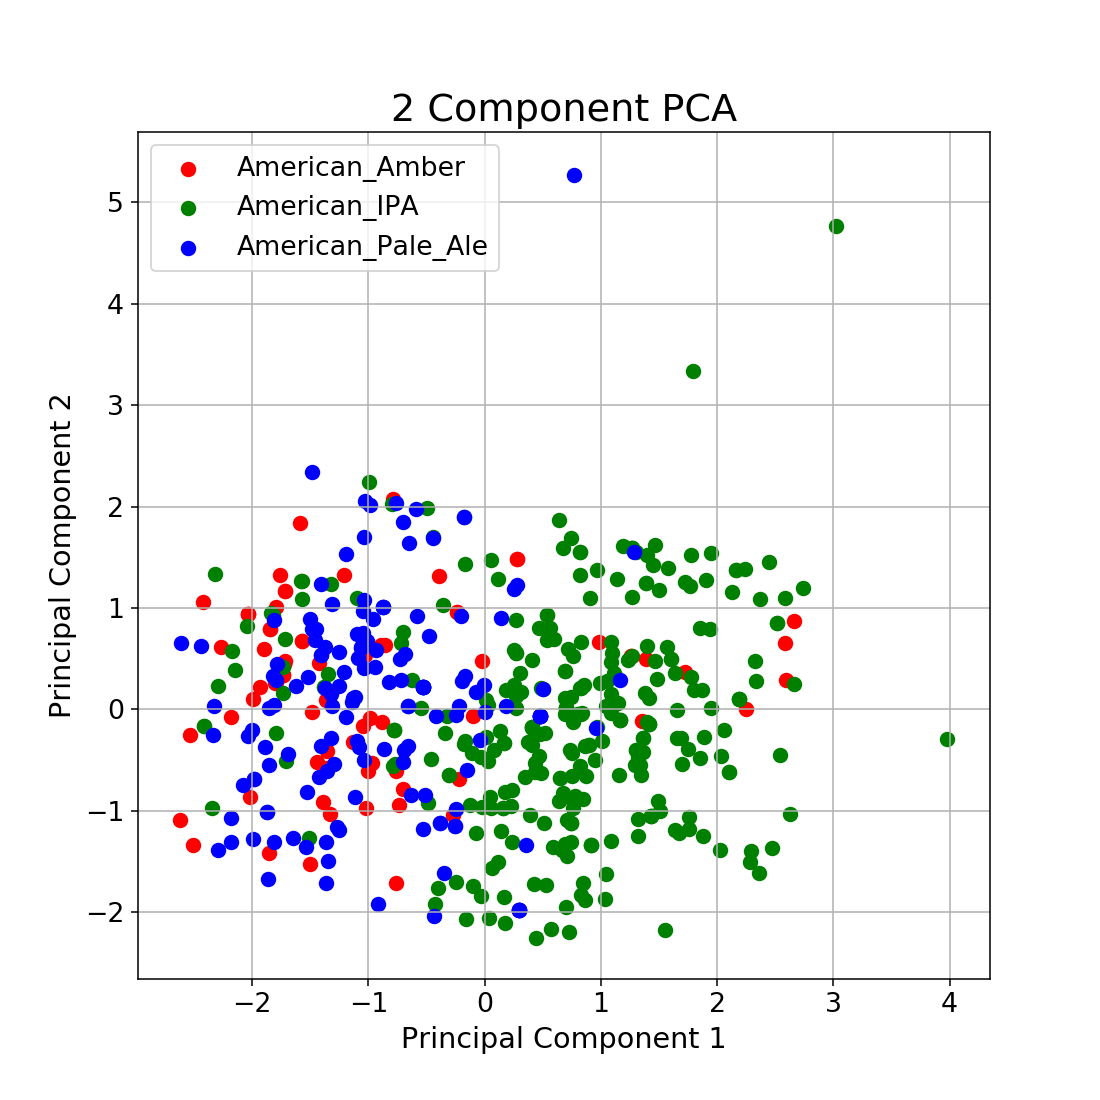

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = ['American_Amber', 'American_IPA', 'American_Pale_Ale']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal_component_1']
               , finalDf.loc[indicesToKeep, 'principal_component_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [32]:
pca.explained_variance_ratio_

array([0.42478985, 0.2582588 ])

In [33]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2','principal_component_3'])

In [34]:
finalDf_2 = pd.concat([principalDf, df[['target']]], axis = 1)

<IPython.core.display.Javascript object>


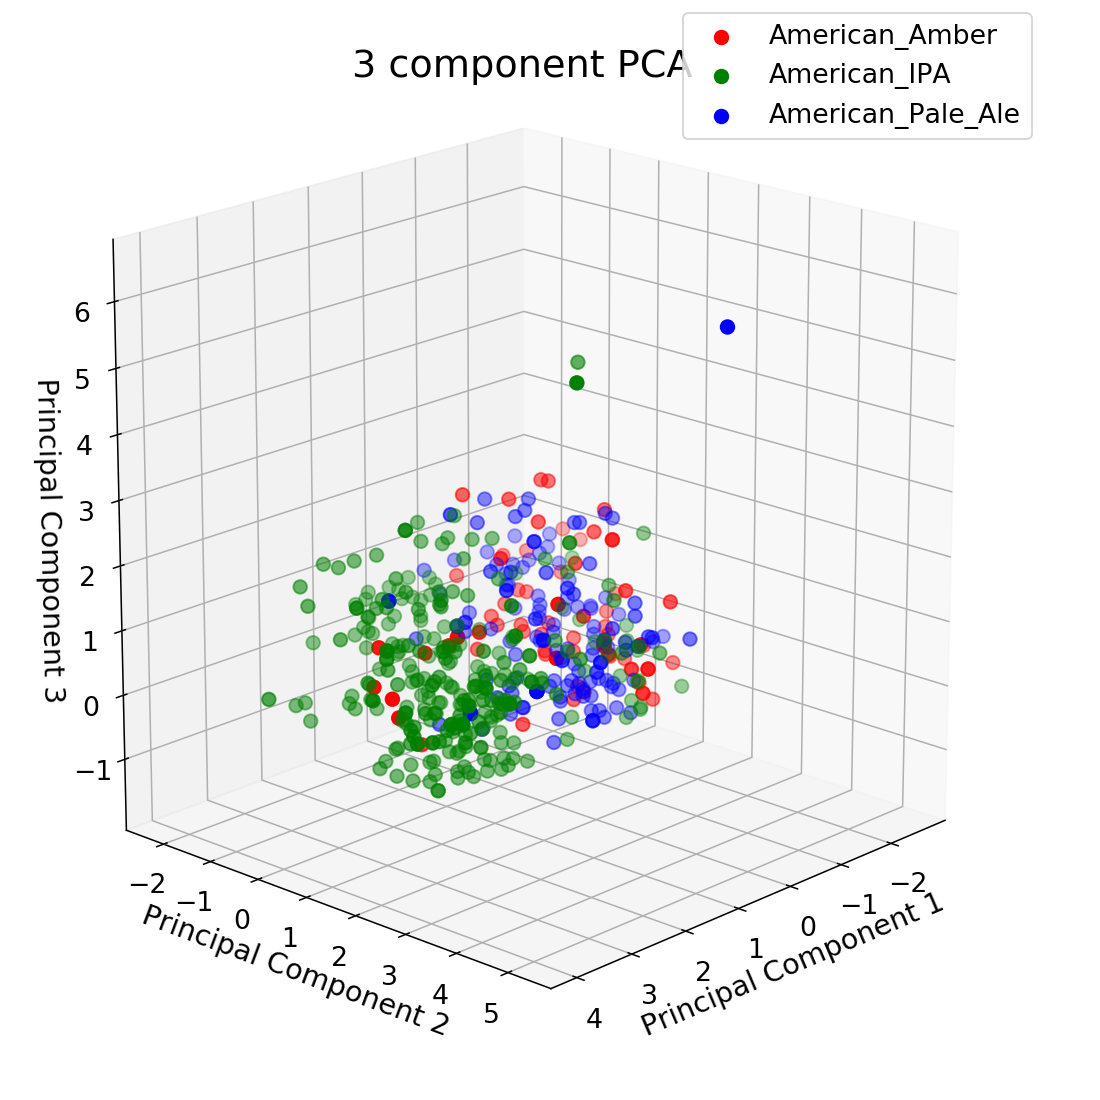

In [35]:
fig = plt.figure(figsize = (8,8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)
plt.cla()

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['American_Amber', 'American_IPA', 'American_Pale_Ale']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_2['target'] == target
    ax.scatter(finalDf_2.loc[indicesToKeep, 'principal_component_1']
               , finalDf_2.loc[indicesToKeep, 'principal_component_2']
               , finalDf_2.loc[indicesToKeep, 'principal_component_3']
               ,c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Metric Eval

In [36]:
finalDf_2 = finalDf_2.drop(['target'], axis=1)

In [50]:
k_range = range(2, 100)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    labels = km.fit_predict(finalDf_2[['principal_component_1','principal_component_2','principal_component_3']])
    scores.append(metrics.silhouette_score(finalDf_2[['principal_component_1','principal_component_2','principal_component_3']], labels))

<IPython.core.display.Javascript object>


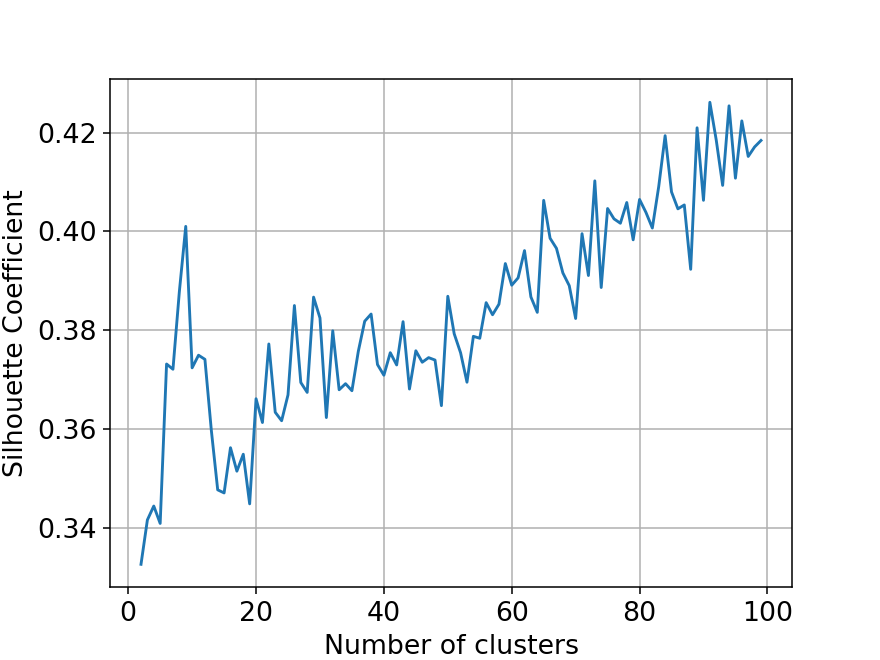

In [51]:
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()